In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


Enter stock symbol (e.g., AAPL, TSLA):  AAPL
Enter start date (YYYY-MM-DD):  2024-01-01
Enter end date (YYYY-MM-DD):  2024-03-25


[*********************100%***********************]  1 of 1 completed


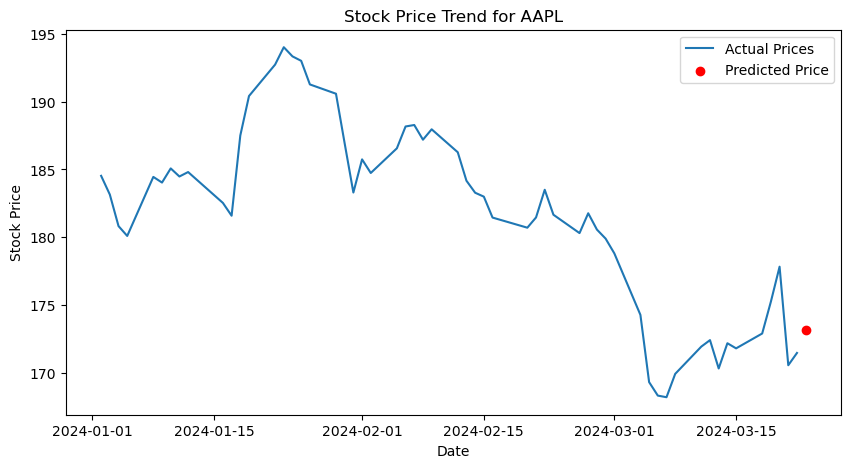

Predicted closing price for the next day: $173.15


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Get user input for stock symbol and date range
stock_symbol = input("Enter stock symbol (e.g., AAPL, TSLA): ")
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# Fetch stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Prepare dataset
data['Date'] = data.index
data['Date'] = data['Date'].map(pd.Timestamp.toordinal)
X = data[['Date']]
y = data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict next day's price
next_day = next_day = np.array([[X['Date'].max() + 1]])  # Extract the max date value correctly

predicted_price = model.predict(next_day)

# Plot stock prices
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Actual Prices')
plt.scatter(pd.Timestamp.fromordinal(next_day[0][0]), predicted_price, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Trend for {stock_symbol}')
plt.legend()
plt.show()

# Output prediction
print(f"Predicted closing price for the next day: ${predicted_price.item():.2f}")